In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data_teata = pd.read_csv('dataset/test_a.csv')
data_teata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 50 columns):
ID                    2469 non-null int64
area                  2469 non-null float64
rentType              2469 non-null object
houseType             2469 non-null object
houseFloor            2469 non-null object
totalFloor            2469 non-null int64
houseToward           2469 non-null object
houseDecoration       2469 non-null object
communityName         2469 non-null object
city                  2469 non-null object
region                2469 non-null object
plate                 2469 non-null object
buildYear             2469 non-null object
saleSecHouseNum       2469 non-null int64
subwayStationNum      2469 non-null int64
busStationNum         2469 non-null int64
interSchoolNum        2469 non-null int64
schoolNum             2469 non-null int64
privateSchoolNum      2469 non-null int64
hospitalNum           2469 non-null int64
drugStoreNum          2469 non-null int64

In [74]:
data_train = pd.read_csv('dataset/train_data.csv')
# data_train.head()

In [75]:
# data_train.describe()
print(data_train.shape)

(41440, 51)


In [38]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 51 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

In [39]:
# 缺失值,只有pv,uv缺
data_train.isnull().sum()

ID                     0
area                   0
rentType               0
houseType              0
houseFloor             0
totalFloor             0
houseToward            0
houseDecoration        0
communityName          0
city                   0
region                 0
plate                  0
buildYear              0
saleSecHouseNum        0
subwayStationNum       0
busStationNum          0
interSchoolNum         0
schoolNum              0
privateSchoolNum       0
hospitalNum            0
drugStoreNum           0
gymNum                 0
bankNum                0
shopNum                0
parkNum                0
mallNum                0
superMarketNum         0
totalTradeMoney        0
totalTradeArea         0
tradeMeanPrice         0
tradeSecNum            0
totalNewTradeMoney     0
totalNewTradeArea      0
tradeNewMeanPrice      0
tradeNewNum            0
remainNewNum           0
supplyNewNum           0
supplyLandNum          0
supplyLandArea         0
tradeLandNum           0


In [77]:
data_train['rentType'][data_train['rentType']=='--'] = '未知方式'
# 转换object类型数据
columns = ['rentType', 'houseFloor', 'houseToward', 'houseDecoration', 'communityName', 'region', 'plate','communityName','city']
for col in columns:
    data_train[col] = data_train[col].astype('category')

# 缺失值用平均值代替
data_train['pv'].fillna(data_train['pv'].mean(),inplace=True)
data_train['uv'].fillna(data_train['uv'].mean(),inplace=True)
# todo:buildyear转为int，户型可分为3个int

In [78]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 51 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null category
houseType             41440 non-null object
houseFloor            41440 non-null category
totalFloor            41440 non-null int64
houseToward           41440 non-null category
houseDecoration       41440 non-null category
communityName         41440 non-null category
city                  41440 non-null category
region                41440 non-null category
plate                 41440 non-null category
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
dru

In [66]:
# 分析筛选目标变量阈值大小
num = len(data_train.index)
for i in range(1, 10):
    s = i*100
    print('{:<6}: {:.5f}'.format(s, len(data_train[data_train['area'] > s]) / num))

100   : 0.16148
200   : 0.01262
300   : 0.00233
400   : 0.00063
500   : 0.00017
600   : 0.00010
700   : 0.00007
800   : 0.00007
900   : 0.00005


In [79]:
# 清洗数据
data_train.drop('ID', axis=1,inplace=True)
# 只有一个city
data_train.drop('city', axis=1,inplace=True)
data_train = data_train[data_train['tradeMoney']<=30000]
data_train = data_train[data_train['area']<=700]

In [93]:
# 数值特征
tradeMoney='tradeMoney'
features=list(data_train.columns)
# features.remove('ID')
features.remove('tradeMoney')
num_features=list()
for i in features:
    if data_train[i].dtype in ['int64','float64']:
        num_features.append(i)
num_features

['area',
 'totalFloor',
 'saleSecHouseNum',
 'subwayStationNum',
 'busStationNum',
 'interSchoolNum',
 'schoolNum',
 'privateSchoolNum',
 'hospitalNum',
 'drugStoreNum',
 'gymNum',
 'bankNum',
 'shopNum',
 'parkNum',
 'mallNum',
 'superMarketNum',
 'totalTradeMoney',
 'totalTradeArea',
 'tradeMeanPrice',
 'tradeSecNum',
 'totalNewTradeMoney',
 'totalNewTradeArea',
 'tradeNewMeanPrice',
 'tradeNewNum',
 'remainNewNum',
 'supplyNewNum',
 'supplyLandNum',
 'supplyLandArea',
 'tradeLandNum',
 'tradeLandArea',
 'landTotalPrice',
 'landMeanPrice',
 'totalWorkers',
 'newWorkers',
 'residentPopulation',
 'pv',
 'uv',
 'lookNum']

In [43]:
# data_train.isnull().any()

In [94]:
len_num_features=len(num_features)
len_num_features

38

In [56]:
data_train.columns

Index(['area', 'rentType', 'houseType', 'houseFloor', 'totalFloor',
       'houseToward', 'houseDecoration', 'communityName', 'city', 'region',
       'plate', 'buildYear', 'saleSecHouseNum', 'subwayStationNum',
       'busStationNum', 'interSchoolNum', 'schoolNum', 'privateSchoolNum',
       'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum', 'shopNum',
       'parkNum', 'mallNum', 'superMarketNum', 'totalTradeMoney',
       'totalTradeArea', 'tradeMeanPrice', 'tradeSecNum', 'totalNewTradeMoney',
       'totalNewTradeArea', 'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum',
       'supplyNewNum', 'supplyLandNum', 'supplyLandArea', 'tradeLandNum',
       'tradeLandArea', 'landTotalPrice', 'landMeanPrice', 'totalWorkers',
       'newWorkers', 'residentPopulation', 'pv', 'uv', 'lookNum', 'tradeTime',
       'tradeMoney'],
      dtype='object')

In [81]:
# 统计特征取值数量
dict_lable={}
for ilabel in data_train.columns:
    dict_lable[ilabel]=len(data_train[ilabel].value_counts())
    print(f'{ilabel}:{len(data_train[ilabel].value_counts())}')
#     print(len(data_train[ilabel].value_counts()))

area:10235
rentType:3
houseType:97
houseFloor:3
totalFloor:51
houseToward:10
houseDecoration:4
communityName:4236
region:15
plate:66
buildYear:80
saleSecHouseNum:28
subwayStationNum:13
busStationNum:59
interSchoolNum:7
schoolNum:44
privateSchoolNum:17
hospitalNum:11
drugStoreNum:42
gymNum:39
bankNum:45
shopNum:56
parkNum:18
mallNum:17
superMarketNum:49
totalTradeMoney:704
totalTradeArea:705
tradeMeanPrice:705
tradeSecNum:333
totalNewTradeMoney:558
totalNewTradeArea:533
tradeNewMeanPrice:557
tradeNewNum:157
remainNewNum:392
supplyNewNum:104
supplyLandNum:4
supplyLandArea:54
tradeLandNum:5
tradeLandArea:46
landTotalPrice:46
landMeanPrice:52
totalWorkers:63
newWorkers:179
residentPopulation:63
pv:710
uv:650
lookNum:32
tradeTime:361
tradeMoney:768


In [82]:
# 稀疏特征
sparse_feature = []
for key,value in dict_lable.items():
    if value<40:
        sparse_feature.append(key)
sparse_feature
# columns = ['rentType', 'houseFloor', 'houseToward', 'houseDecoration', 'communityName', 'region', 'plate','communityName','city']

['rentType',
 'houseFloor',
 'houseToward',
 'houseDecoration',
 'region',
 'saleSecHouseNum',
 'subwayStationNum',
 'interSchoolNum',
 'privateSchoolNum',
 'hospitalNum',
 'gymNum',
 'parkNum',
 'mallNum',
 'supplyLandNum',
 'tradeLandNum',
 'lookNum']

D:\software\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


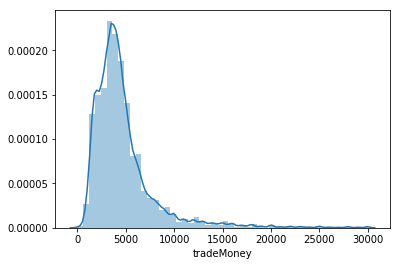

In [48]:
sns.distplot(data_train['tradeMoney'])

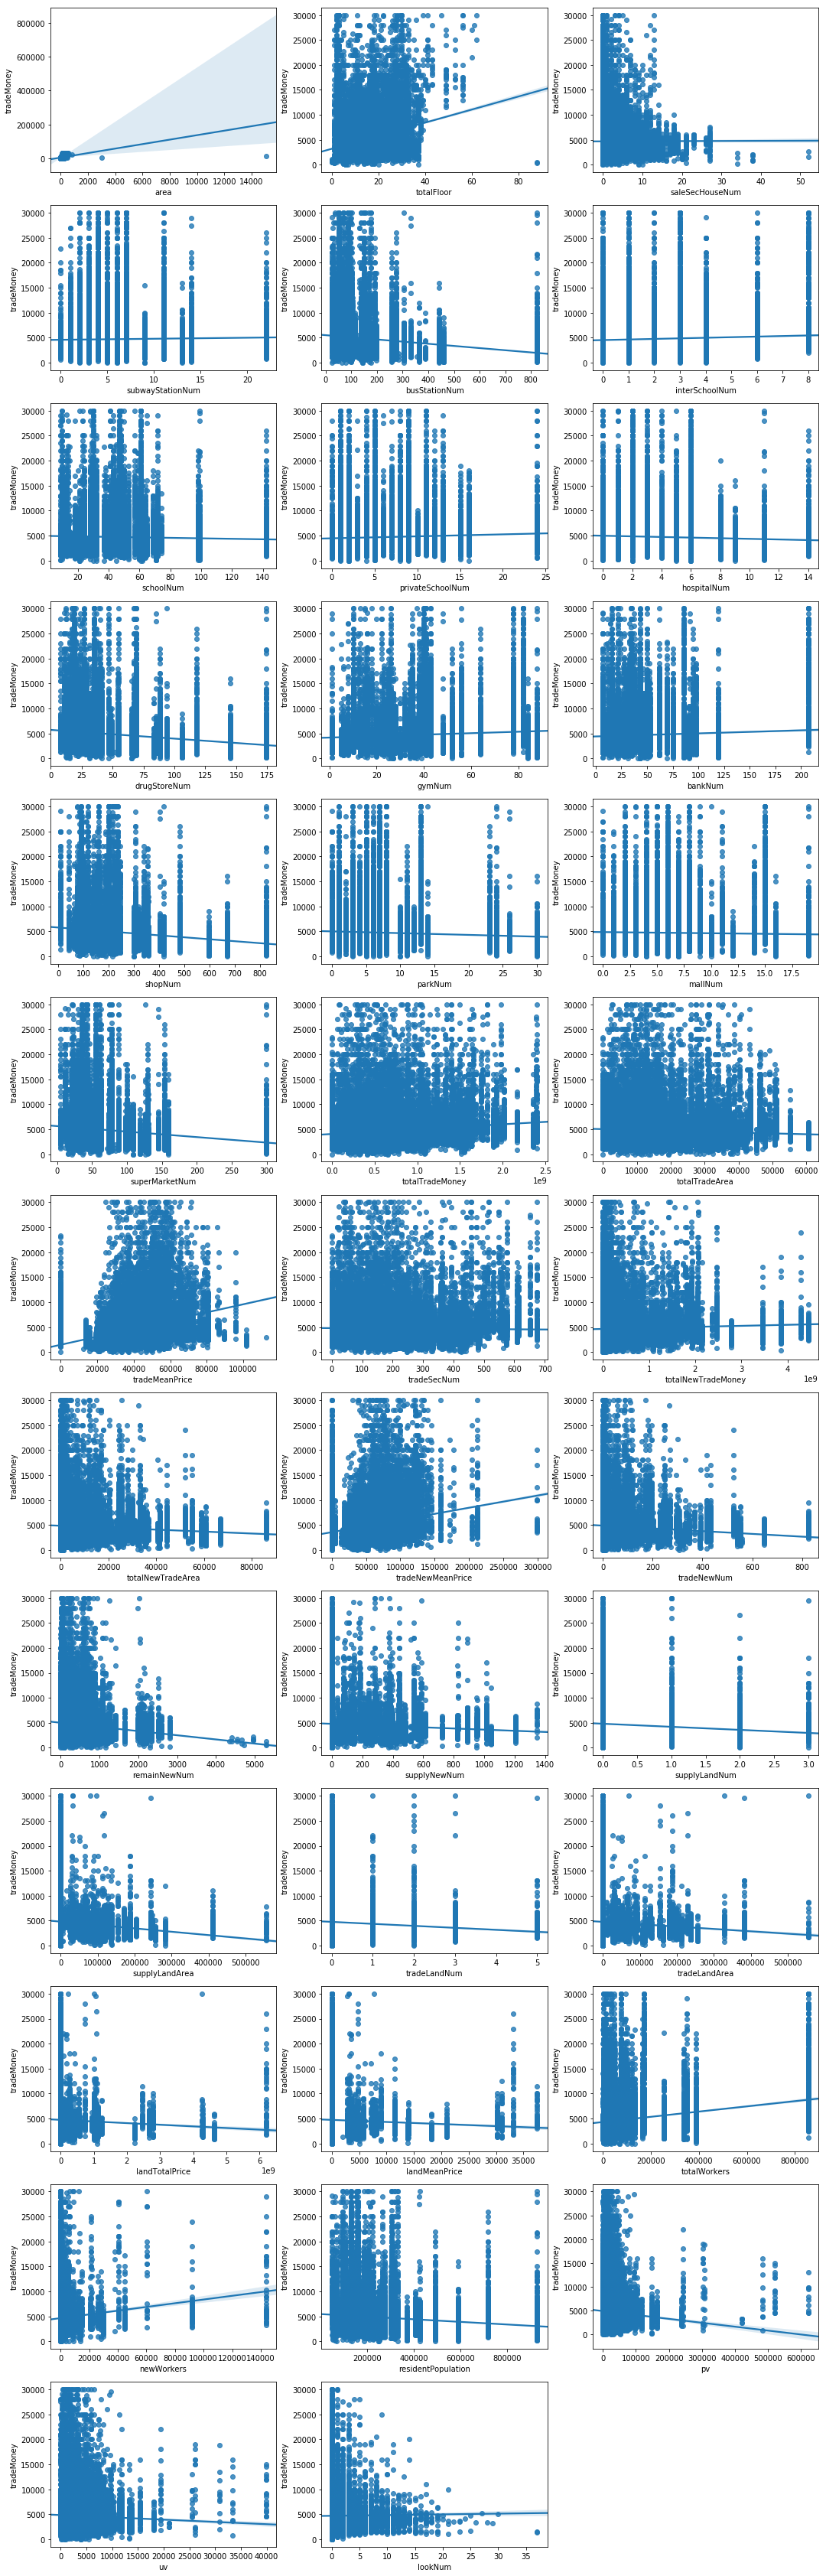

In [61]:
# 线性拟合，结果看起来并不好
plt.figure(figsize = (18, 180))
for i, feature in enumerate(num_features, 1):
    plt.subplot(len_num_features, 3, i)
    sns.regplot(x=feature, y=tradeMoney, data=data_train)

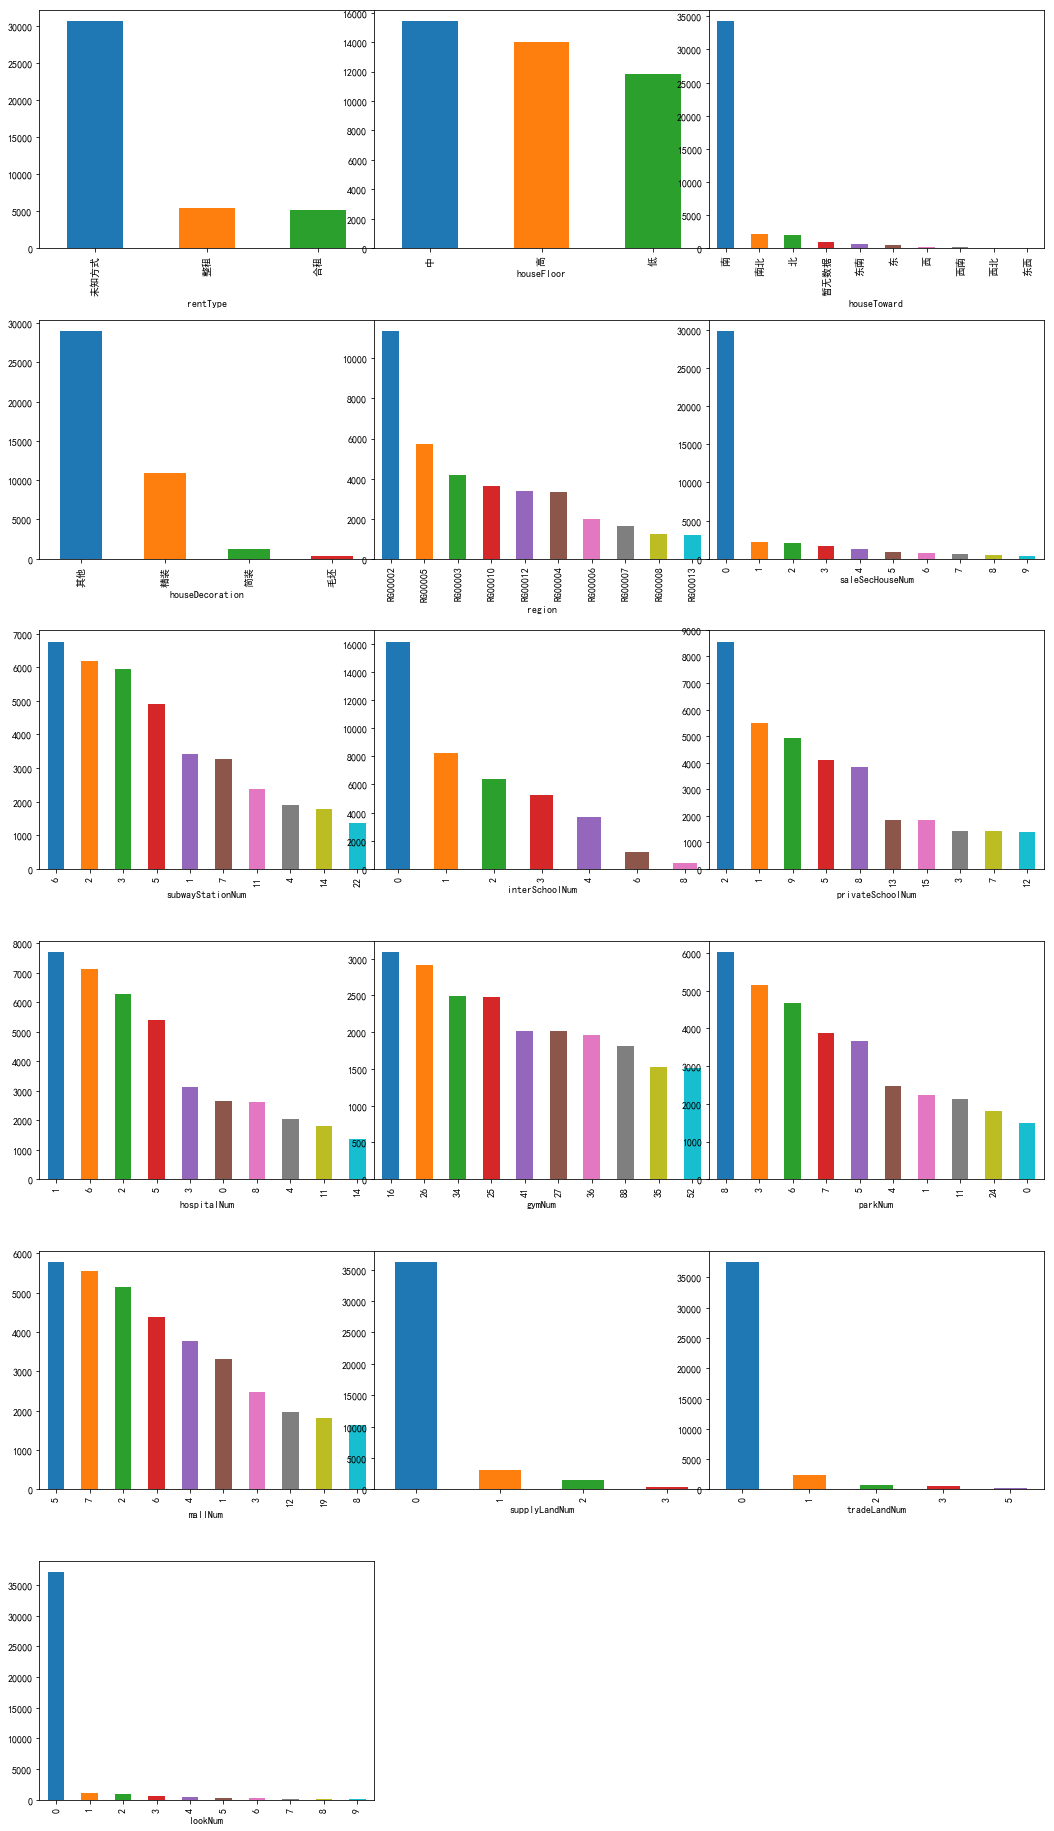

In [92]:
# 稀疏特征取值分布
plt.figure(figsize = (18, 90))
plt.subplots_adjust(wspace =0, hspace =0.3)
len_sparse_feature=len(sparse_feature)
for i, feature in enumerate(sparse_feature, 1):
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.subplot(len_sparse_feature, 3, i)
    data_train[feature].value_counts()[:10].plot.bar()
    plt.xlabel(feature)